# HSE 2024: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [3]:
def find_product(a,r,N):
    arr_product = [a]
    for i in range(N-1):
        arr_product.append(arr_product[-1]*r)
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a,r,N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [4]:
def check_palindrome(N):
    check_palindrome = (str(N) == str(N)[::-1])
    return check_palindrome

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [5]:
def find_palindromes(N):
    palindromes = []
    n = 1000
    while(True):
        if check_palindrome(n):
            palindromes.append(n)
            if len(palindromes) == N:
                break
        n += 1
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [6]:
from random import randint
def find_min(a, b, c):
    min_ = a
    if b < min_:
        min_ = b
    if c < min_:
        min_ = c
    return min_

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-29 -23 -7 	Minimum: -29
-80 67 -57 	Minimum: -80
-20 24 21 	Minimum: -20
-91 -90 -11 	Minimum: -91
-96 -76 -23 	Minimum: -96
20 -39 -7 	Minimum: -39
97 -42 -57 	Minimum: -57
-83 -6 -32 	Minimum: -83
29 -12 52 	Minimum: -12
82 -61 92 	Minimum: -61


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [7]:
my_array = np.random.rand(16)
my_array = np.append(my_array, 6 - my_array.sum())
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$


In [8]:
def calculate_manhattan(a, b):    
    distance = np.sum(np.abs(a-b))
    return distance

def calculate_euclidean(a, b):    
    distance = np.sqrt(np.square(a-b).sum())
    return distance

def calculate_chebyshev(a, b):    
    distance = np.absolute(a-b).max()
    return distance

def calculate_cosine(a, b):    
    distance = 1 - np.dot(a, b)/(np.sqrt(np.square(a).sum())*np.sqrt(np.square(b).sum()))
    return distance

In [9]:
a = np.random.rand(5)
b = np.random.rand(5)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

Manhattan distance: 1.7238572285815037
Euclidean distance: 0.8711231111871337
Chebyshev distance: 0.5474454308030219
Cosine distance: 0.29654160193510704


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [10]:
def transform(array):
    x1 = np.min(array)
    x2 = np.max(array)
    array = array*(3/(x2-x1)) - (4 + 3*x1/(x2-x1))
    return array

In [11]:
my_array = np.random.randint(-147, 1001, size=76) #any range works
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4.0
Max: -1.0
Array:
[-2.984      -3.552      -2.05333333 -1.01066667 -2.40266667 -2.17866667
 -3.74133333 -1.57333333 -3.86133333 -3.392      -3.096      -1.40266667
 -1.         -2.60266667 -2.408      -3.15466667 -1.96       -2.99733333
 -2.43466667 -3.93866667 -3.73066667 -3.65333333 -2.168      -3.87733333
 -3.28533333 -2.43733333 -1.65866667 -1.63466667 -1.656      -3.952
 -1.64266667 -2.29066667 -1.544      -3.98933333 -2.608      -2.22133333
 -2.448      -1.90133333 -1.176      -2.12       -1.02133333 -2.824
 -1.81866667 -3.75733333 -1.088      -2.89333333 -2.664      -2.42666667
 -2.224      -1.896      -2.76266667 -2.67466667 -1.70133333 -2.27466667
 -2.30933333 -2.54666667 -3.42133333 -3.192      -3.58133333 -3.144
 -2.112      -3.50666667 -1.69066667 -4.         -3.696      -3.33333333
 -2.83733333 -3.41866667 -1.29333333 -3.776      -3.54133333 -1.67466667
 -3.768      -2.552      -2.19733333 -2.69866667]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [12]:
my_array = np.random.randint(-7, 44, (8, 5))
selected_column = np.argmax(my_array)%5
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[41 14 20 37 13]
 [11 31 13 -6 42]
 [ 2 20  2 42 25]
 [41 30  4 14 17]
 [33 28 -5 41 23]
 [22 28 40 29  5]
 [25 23 31 31 33]
 [40 40 28 20 40]]
Selected column: 4


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [13]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.55034516 0.15785966        nan        nan        nan 0.69599254
 0.60820952 0.21100531 0.32411595        nan]


In [14]:
def replace_missing(arr):
    arr[np.where(np.isnan(arr))] = np.nanmedian(arr)
    return arr

In [15]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Array with no missing values:
[0.55034516 0.15785966 0.43723056 0.43723056 0.43723056 0.69599254
 0.60820952 0.21100531 0.32411595 0.43723056]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [16]:
def mean_channel(X):
    mean_vector = np.mean(X, axis=(0, 1))
    return mean_vector

In [17]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
print(f'Vector of means: {mean_channel(X)}')

Vector of means: [-1.98398169 -1.83981693 -1.93135011]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [18]:
def get_unique_columns(X):
    X_unique = np.unique(X, axis = 1)
    return X_unique

In [19]:
X =  np.random.randint(4, 6, size=(n, 3, 3))
print('Matrix:')
print(X)
print('Unique columns:')
get_unique_columns(X)

Matrix:
[[[4 4 5]
  [5 4 5]
  [5 5 5]]

 [[4 5 5]
  [5 4 4]
  [4 5 4]]

 [[5 4 4]
  [4 5 4]
  [5 5 4]]

 [[5 5 5]
  [5 5 4]
  [5 5 5]]

 [[4 5 5]
  [5 4 5]
  [4 4 5]]

 [[4 4 4]
  [4 4 4]
  [5 4 5]]

 [[5 4 4]
  [4 5 5]
  [4 5 4]]

 [[5 4 5]
  [4 5 4]
  [4 4 5]]

 [[5 5 5]
  [5 4 5]
  [5 5 5]]

 [[5 5 4]
  [5 5 5]
  [5 4 5]]

 [[5 5 4]
  [4 5 5]
  [5 4 5]]

 [[5 5 5]
  [5 5 4]
  [4 4 5]]

 [[4 4 4]
  [4 5 4]
  [4 5 5]]

 [[5 4 5]
  [5 4 4]
  [5 5 4]]

 [[4 5 5]
  [5 5 5]
  [4 5 5]]

 [[4 4 4]
  [4 4 5]
  [4 4 5]]

 [[5 4 4]
  [5 5 4]
  [5 4 5]]

 [[5 4 4]
  [5 4 5]
  [5 5 5]]

 [[4 5 5]
  [5 4 4]
  [4 4 4]]]
Unique columns:


array([[[4, 4, 5],
        [5, 4, 5],
        [5, 5, 5]],

       [[4, 5, 5],
        [5, 4, 4],
        [4, 5, 4]],

       [[5, 4, 4],
        [4, 5, 4],
        [5, 5, 4]],

       [[5, 5, 5],
        [5, 5, 4],
        [5, 5, 5]],

       [[4, 5, 5],
        [5, 4, 5],
        [4, 4, 5]],

       [[4, 4, 4],
        [4, 4, 4],
        [5, 4, 5]],

       [[5, 4, 4],
        [4, 5, 5],
        [4, 5, 4]],

       [[5, 4, 5],
        [4, 5, 4],
        [4, 4, 5]],

       [[5, 5, 5],
        [5, 4, 5],
        [5, 5, 5]],

       [[5, 5, 4],
        [5, 5, 5],
        [5, 4, 5]],

       [[5, 5, 4],
        [4, 5, 5],
        [5, 4, 5]],

       [[5, 5, 5],
        [5, 5, 4],
        [4, 4, 5]],

       [[4, 4, 4],
        [4, 5, 4],
        [4, 5, 5]],

       [[5, 4, 5],
        [5, 4, 4],
        [5, 5, 4]],

       [[4, 5, 5],
        [5, 5, 5],
        [4, 5, 5]],

       [[4, 4, 4],
        [4, 4, 5],
        [4, 4, 5]],

       [[5, 4, 4],
        [5, 5, 4],
        [5, 4, 5]]

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [20]:
dataset =  pd.read_csv('titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

In [21]:
## Are there any missing values? (YES)
## In what columns? (Age, Cabin, Embarked)
dataset.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [22]:
## What is the percentage of survived passengers? (38.(38)%)
survived = dataset[dataset['Survived'] == 1]
survived_percentage = len(survived)/len(dataset)*100
survived_percentage

38.38383838383838

In [23]:
## Are the classes balanced? (NO, survival rate vary depending on the class)
## Pclass
## 1    0.629630
## 2    0.472826
## 3    0.242363
survived_grouped = survived.groupby('Pclass').sum()
grouped = dataset.groupby('Pclass').count()
survived_grouped['Survived']/grouped['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [24]:
## Were there more males or females? (More males, 577 over 314)
male_female = dataset.groupby('Sex').count()
male_female

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [25]:
## What what the least popular port of embarkation? (Queenstown)
dataset['Embarked'].value_counts().tail()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [26]:
## How many classes (pclass) were there on Tinanic? (3)
len(pd.unique(dataset['Pclass']))

3

In [27]:
## What is the overall average ticket fare? (32.2)
## And for every class? 
## Pclass   Fare
## 1        84.14
## 2        20.66
## 3        13.67
average_fare = dataset['Fare'].mean()
average_fare_by_class = dataset[['Pclass', 'Fare']].groupby('Pclass').mean()
average_fare_by_class

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

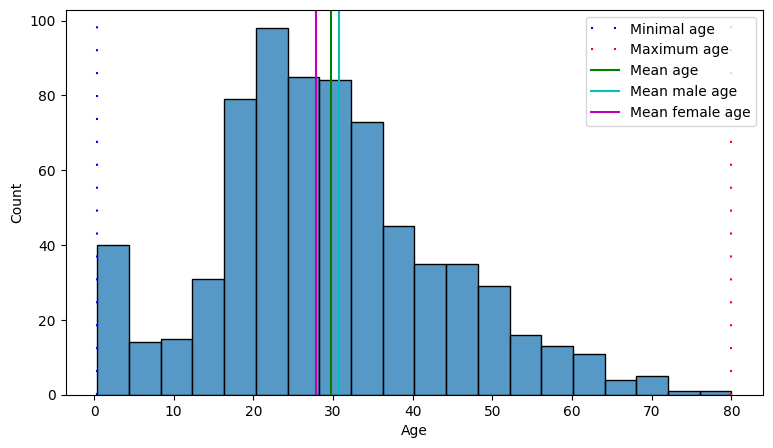

In [28]:
## What is the minimal and maximum ages of the passengers? (0.42; 80.0)

## What is the mean age? (29.69)
## And among males and females sepatately? (30.72 ;27.91)

## Mode is larger than median and median is larger than mean, this distribution is right-skewed and unimodal.
## The largest group of passengers was in the age category from 20 to 30. 
## It can also be noted that the children most of the children were between 0 and approximately 4 years old.

plt.figure(figsize=(9,5))

sns.histplot(data=dataset, x='Age')
max_age = dataset['Age'].max()
min_age = dataset['Age'].min()

plt.axvline(x=min_age, color='b', linestyle=(0, (1, 10)), label='Minimal age')
plt.axvline(x=max_age, color='r', linestyle=(0, (1, 10)), label='Maximum age')

mean_age = dataset['Age'].mean(skipna=True)
plt.axvline(x=mean_age, color='g', linestyle='solid', label='Mean age')

mean_male_age = dataset[dataset['Sex'] == 'male']['Age'].mean()
mean_female_age = dataset[dataset['Sex'] == 'female']['Age'].mean()
plt.axvline(x=mean_male_age, color='c', linestyle='solid', label='Mean male age')
plt.axvline(x=mean_female_age, color='m', linestyle='solid', label='Mean female age')

plt.legend()


**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [29]:
## How many are there unique titles? (17)

names = dataset['Name']
titles = names.str.extract('([A-Za-z]+)\.')
titles = titles.iloc[:,0]

len(titles.unique())

17

In [30]:
## How many are there passengers with every title?
## Mr          517
## Miss        182
## Mrs         125
## Master       40
## Dr            7
## Rev           6
## Mlle          2
## Major         2
## Col           2
## Countess      1
## Capt          1
## Ms            1
## Sir           1
## Lady          1
## Mme           1
## Don           1
## Jonkheer      1

## What is the most popular man's title? (Mr, 517)
## And woman's title? (Miss, 182)

titles.value_counts()

0
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**



In [31]:
## Is there correlation between pclass and ticket price? (Yes, quite strong correlation)
dataset['Pclass'].corr(dataset['Fare'])

-0.5494996199439082

(-30.0, 120.0)

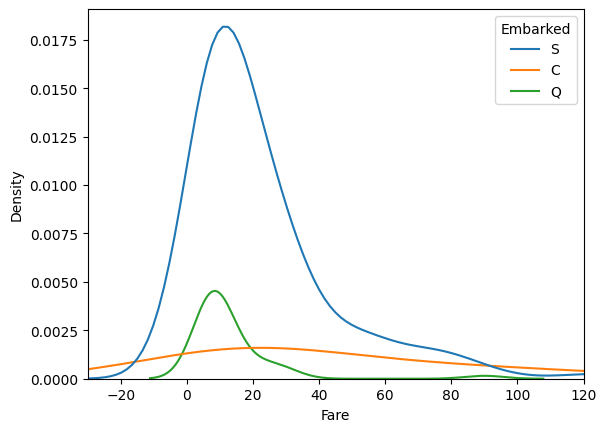

In [38]:
## Calculate mean price for each port and visualize prize distribution for each port.
## C	59.954144
## Q	13.276030
## S	27.079812


## From the graph it can be seen that the vast majority of passengers embarked at Southampton port
## and most of the tickets were sold to the second class, according to prices. The distribution of prices for passenger's tickets
## who embarked at Cherbourg is distributed more smoothly and are closer to first class mean price. Almost all 
## tickets sold at Queenstown port are third class tickets.

## Conclusion: the distribution of prices by port is in many ways similar to the distribution of prices by class

average_fare_by_port = dataset[['Embarked', 'Fare']].groupby('Embarked').mean()
ax = sns.kdeplot(data=dataset, x=dataset["Fare"], hue='Embarked')
ax.set_xlim(-30, 120)

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [186]:
## Is there correlation between pclass and ticket price? (Yes, -0.54, higher the number of a class - less price)
dataset['Pclass'].corr(dataset['Fare'])

-0.5494996199439082

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

              Age
Pclass           
1       35.368197
2       25.901566
3       20.646118
              Age
Pclass           
1       43.695312
2       33.544444
3       26.555556


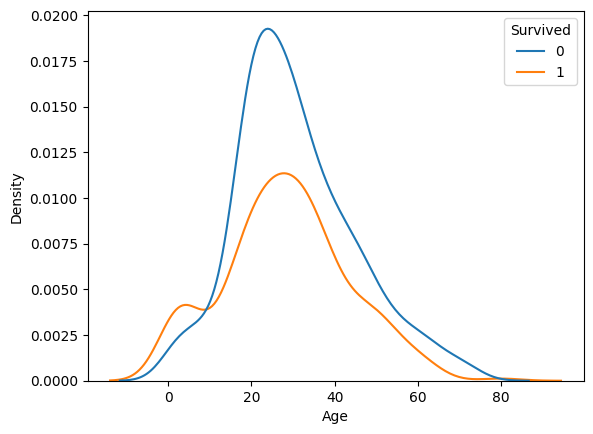

In [60]:
## Survivors are on average two years younger, which may indicate that priority in rescue was given to children
## This hypothesis is confirmed by the jump in the age of survivors relative to survivors aged 0 to 10

## Mean age of survived passengers is less than mean age of non-survived passengers in every class
## Also on average, the more expensive the class, the older the passengers

survived = dataset[dataset['Survived'] == 1]
not_survived = dataset[dataset['Survived'] == 0]

average_survived_age_by_class = survived[['Age', 'Pclass']].groupby('Pclass').mean()
average_not_survived_age_by_class = not_survived[['Age', 'Pclass']].groupby('Pclass').mean()

sns.kdeplot(data=dataset, x='Age', hue='Survived')
print(average_survived_age_by_class)
print(average_not_survived_age_by_class)

<Axes: xlabel='Age', ylabel='Density'>

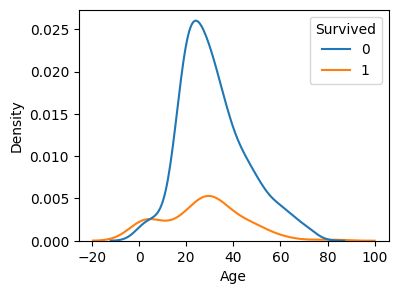

In [67]:
## The graphs for women and men differ very much, while there are many times more dead men than survivors,
## for women the situation is exactly the opposite, which again suggests that women and children were rescued first

plt.figure(figsize=(4, 3))

male = dataset[dataset['Sex'] == 'male']
female = dataset[dataset['Sex'] == 'female']

sns.kdeplot(data=male, x='Age', hue='Survived')

<Axes: xlabel='Age', ylabel='Density'>

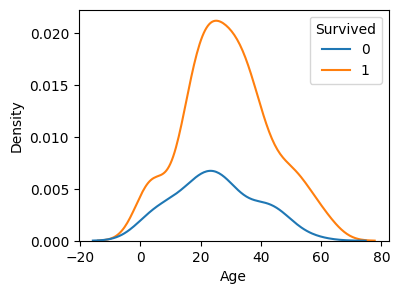

In [68]:
plt.figure(figsize=(4, 3))

sns.kdeplot(data=female, x='Age', hue='Survived')